In [1]:
#%% Modules
import numpy as np
import matplotlib.pyplot as plt

# The module cartopy is not part of the standard Python modules, and you would have to include it in your enviroment.
# there is other modules that can do similar to cartopy, feel free to use those insted if desired. 
import cartopy.crs as crs

# Other modules that can be helpfull to know off, scipy.fft are used in the functions "Gauss2Dconv_v1" and "griddata" is usefull later
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from scipy.interpolate import griddata


In [7]:
# Load the "db.dat" dataset
data = np.loadtxt("db.dat")

# Access columns
Measurements_number = data[:, 0]
Latitude = data[:, 1]
Longitude = data[:, 2]
height = data[:, 3]
Gravity = data[:, 4]

Question 1: Loading the Data File

In [28]:
#%% Parameters

#%% For image plot
# Here I generate some random values. When a real dataset is loaded use that insted.
Images_random_values = np.random.rand(100,100)

latlon_area_of_interest = [min(Longitude), max(Longitude), min(Latitude), max(Latitude)] # min-max of latitude and longitude for dataset
latlon_data_extend = [min(Longitude), max(Longitude), min(Latitude), max(Latitude)] # min-max of latitude and longitude for the wanted area to see

#%% For scatter plot
scatter_random_values = np.array([Longitude, 
                                  Latitude, 
                                  height]).T


/opt/anaconda3/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


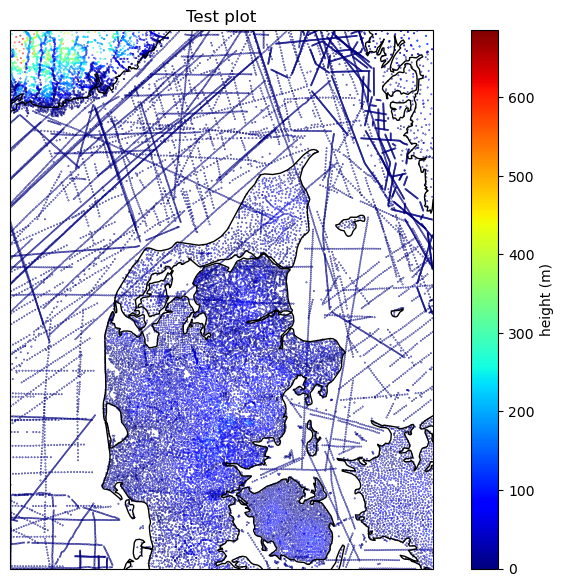

In [29]:
# scatter plot
fig, axs = plt.subplots(1,1, figsize=(10, 7), 
                        sharex=True, sharey=True,
                        subplot_kw={'projection': crs.Mercator()})

axs.coastlines() # add costline
axs.set_extent(latlon_area_of_interest, crs=crs.PlateCarree()) # area of interest, this is the extend we see


im = axs.scatter(x=scatter_random_values[:,0], y=scatter_random_values[:,1], c=scatter_random_values[:,2],
                 s=0.1, # size of dot
                 cmap='jet',
                 transform=crs.PlateCarree())

axs.set_title('Test plot')


h = plt.colorbar(im, ax=axs)
h.set_label('height (m)')

In [30]:
scatter_random_values = np.array([Longitude, 
                                  Latitude, 
                                  Gravity]).T

/opt/anaconda3/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


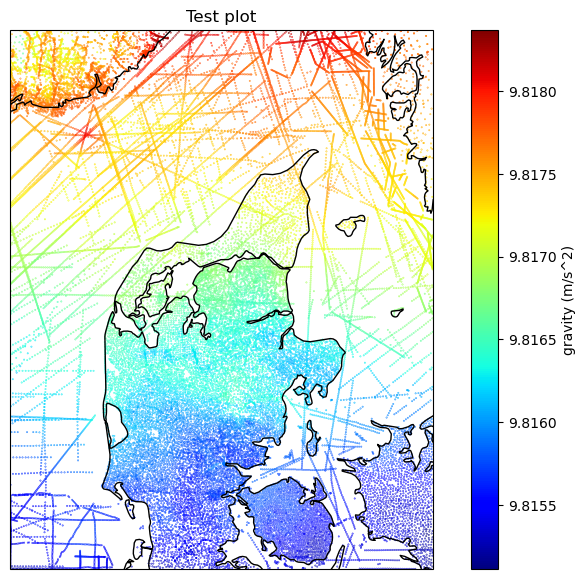

In [31]:
# scatter plot
fig, axs = plt.subplots(1,1, figsize=(10, 7), 
                        sharex=True, sharey=True,
                        subplot_kw={'projection': crs.Mercator()})

axs.coastlines() # add costline
axs.set_extent(latlon_area_of_interest, crs=crs.PlateCarree()) # area of interest, this is the extend we see


im = axs.scatter(x=scatter_random_values[:,0], y=scatter_random_values[:,1], c=scatter_random_values[:,2],
                 s=0.1, # size of dot
                 cmap='jet',
                 transform=crs.PlateCarree())

axs.set_title('Test plot')


h = plt.colorbar(im, ax=axs)
h.set_label('gravity (m/s^2)')

Question 2: From Gravity to Gravity Anomalies